# What is Multiple Linear Regression?
- “Predict one thing using multiple other things.”
- multiple inputs and one output
- draw a plane for 2d and hyperplane for onwords

## Formula:
y=b0+b1x1+b2x2+b3x3+...+bnxn

Where:

y is what we want to predict (like salary),

x₁, x₂, ..., xₙ are the input features (like age, experience),

b₀ is the intercept,

b₁, b₂, ..., bₙ are the coefficients (weights for each feature).

## Example:
Predict a person’s salary based on:

- Years of experience

- Age

- Education level

## What does it do?
It learns the best combination of weights (b₁, b₂, …) to minimize the difference between:

- what it predicts, and

- the actual values in the data.



In [29]:
import pandas as pd
import numpy as np

np.random.seed(42)

# Generate features
engine_size = np.random.uniform(1.0, 5.0, 200)    # in liters
weight = np.random.uniform(1000, 3000, 200)       # in kg
speed = np.random.uniform(20, 120, 200)           # in km/h

# Fuel consumption (some made-up linear relation + noise)
fuel_consumption = (
    5 * engine_size + 
    0.002 * weight - 
    0.03 * speed + 
    np.random.normal(0, 0.5, 200)  # noise
)

# Create DataFrame
df = pd.DataFrame({
    'engine_size': engine_size,
    'weight': weight,
    'speed': speed,
    'fuel_consumption': fuel_consumption
})

# Save to CSV
df.to_csv('car_fuel_data.csv', index=True)

In [30]:

# Load data
df = pd.read_csv('car_fuel_data.csv')


In [4]:
df.head()

,engine_size,weight,speed,fuel_consumption
0,2.498160,2284.063292,30.312387,15.884429
1,4.802857,1168.279930,110.255291,22.646751
2,3.927976,1323.257428,70.525237,20.117121
3,3.394634,2797.108377,102.645747,18.970393
4,1.624075,2212.858119,52.004960,10.709116


In [3]:
# Features and target
X = df[['engine_size', 'weight', 'speed']]
y = df['fuel_consumption']


In [10]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting

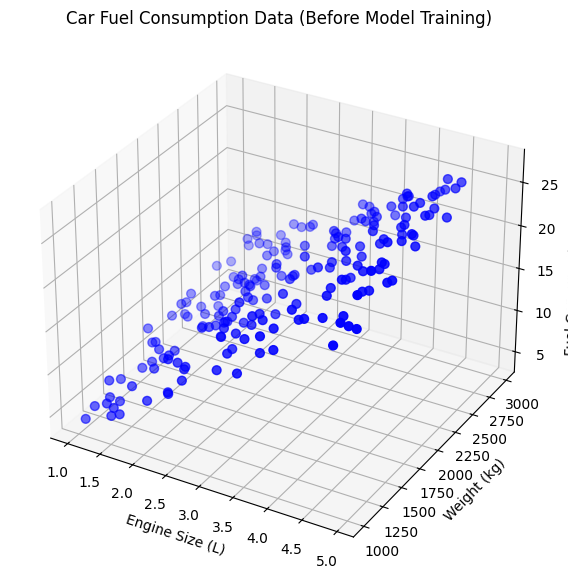

In [14]:
# Extract relevant columns
engine_size = df['engine_size']
weight = df['weight']
fuel_consumption = df['fuel_consumption']

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(engine_size, weight, fuel_consumption, c='blue', marker='o', s=40)

# Labels
ax.set_xlabel('Engine Size (L)')
ax.set_ylabel('Weight (kg)')
ax.set_zlabel('Fuel Consumption (L/100km)')
ax.set_title('Car Fuel Consumption Data (Before Model Training)')

plt.show()

In [12]:
# Create and train model
model = LinearRegression()
model.fit(X, y)
# Fix speed at mean value
speed_fixed = df['speed'].mean()

In [7]:
# Print coefficients and intercept
print("Coefficients (slopes):", model.coef_)
print("Intercept:", model.intercept_)

Coefficients (slopes): [ 4.99439744e+00  1.93694068e-03 -2.86018741e-02]
Intercept: 0.012612402450489668


In [8]:
# Predict fuel consumption for a new car
# Example new car data: engine_size=3.5L, weight=1500kg, speed=80 km/h
new_car = [[3.5, 1500, 80]]

predicted_fuel = model.predict(new_car)


Predicted fuel consumption: 18.11 liters/100km
c:\Users\Eden Computers\Desktop\ML Folder\venv2\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [9]:
print(f"Predicted fuel consumption: {predicted_fuel[0]:.2f} liters/100km")


Predicted fuel consumption: 18.11 liters/100km


c:\Users\Eden Computers\Desktop\ML Folder\venv2\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


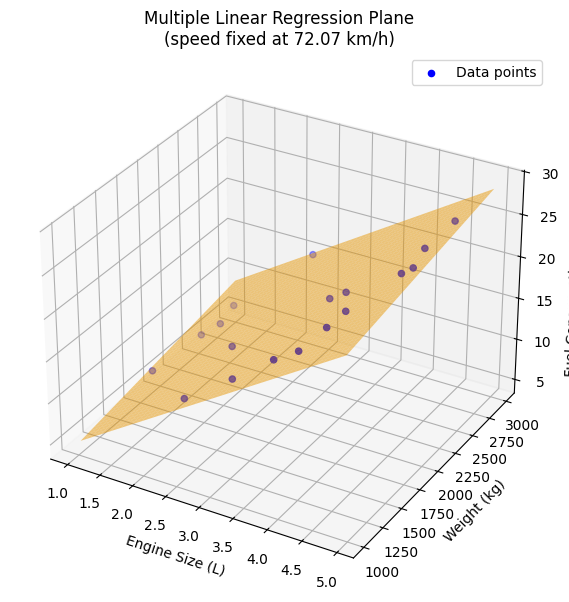

In [13]:

# Create grid of engine_size and weight
engine_size_range = np.linspace(df['engine_size'].min(), df['engine_size'].max(), 50)
weight_range = np.linspace(df['weight'].min(), df['weight'].max(), 50)
engine_size_grid, weight_grid = np.meshgrid(engine_size_range, weight_range)

# Flatten the grid to feed into model
grid_points = np.c_[engine_size_grid.ravel(), weight_grid.ravel(), np.full(engine_size_grid.size, speed_fixed)]

# Predict fuel consumption over the grid
fuel_pred = model.predict(grid_points).reshape(engine_size_grid.shape)

# Plotting
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Scatter original data (for engine_size and weight with fixed speed)
# Filter data where speed is close to fixed speed (optional)
speed_tolerance = 5
filtered = df[(df['speed'] > speed_fixed - speed_tolerance) & (df['speed'] < speed_fixed + speed_tolerance)]
ax.scatter(filtered['engine_size'], filtered['weight'], filtered['fuel_consumption'], color='blue', label='Data points')

# Plot regression plane
ax.plot_surface(engine_size_grid, weight_grid, fuel_pred, color='orange', alpha=0.5)

ax.set_xlabel('Engine Size (L)')
ax.set_ylabel('Weight (kg)')
ax.set_zlabel('Fuel Consumption (L/100km)')
ax.set_title('Multiple Linear Regression Plane\n(speed fixed at {:.2f} km/h)'.format(speed_fixed))
ax.legend()

plt.show()

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Ensure both y and y_pred are 1D arrays
y_true = y.values.ravel()
predicted_fuel= model.predict(X).ravel()

mae = mean_absolute_error(y,predicted_fuel)
mse = mean_squared_error(y,predicted_fuel)
rmse = np.sqrt(mse)
r2 = r2_score(y,predicted_fuel)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 0.40192220455437605
MSE: 0.25434478588365855
RMSE: 0.5043260709934184
R² Score: 0.9931632308828259


In [17]:

# Add bias term
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Normal Equation
beta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print("Intercept (β₀):", beta[0])
print("Coefficients (β₁, β₂):", beta[1:])

Intercept (β₀): 0.012612402450449478
Coefficients (β₁, β₂): [ 4.99439744e+00  1.93694068e-03 -2.86018741e-02]


In [19]:
model.intercept_

np.float64(0.012612402450489668)

In [25]:
model.coef_ 

array([ 4.99439744e+00,  1.93694068e-03, -2.86018741e-02])

In [27]:
b1,b2,b3=model.coef_ 

In [22]:
b1

np.float64(4.99439743935238)

In [23]:
b2

np.float64(0.0019369406757988666)

In [24]:
b3

np.float64(-0.0286018741102103)

In [28]:
# Print coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)  # [engine_size, weight, speed]

Intercept: 0.012612402450489668
Coefficients: [ 4.99439744e+00  1.93694068e-03 -2.86018741e-02]
